In [1]:
import billboard
import pandas as pd
import json
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# cleaning song titles and artists' names
# removes words that will not be in the query
def clean(name):
    cl_str = ''
    for word in name.split():
        if word not in ['featuring', 'Featuring', '&', ',', 'X', 'x']:
            cl_str = cl_str + word + ' '
    return cl_str

# returns a list of strings containing song titles and artists to be queried
def get_title_artist(chart):
    talist = []
    for i in range(0,100):
        title_artist = clean(chart[i].title)+' '+clean(chart[i].artist)
        talist.append(title_artist)
    return talist

In [3]:
def get_authenticated_api_client():
    '''
    Returns an authenticated Spotipy API client, using credentials stored in environment variables. 
    Inputs: None
    Outputs: 
    '''
    
    client_credentials_manager = SpotifyClientCredentials()
    return spotipy.Spotify(client_credentials_manager=client_credentials_manager)

sp = get_authenticated_api_client()

In [4]:
# returns url of songs as a list
def get_url(title_artist):
    url_list = []
    for song in title_artist:
        try:
            search_result = sp.search(q=song, type='track', limit=1)['tracks']['items'][0]['external_urls']['spotify']
            
            if search_result is not None:
                url_list.append(search_result)
        except:
            print(song)
    return url_list

In [26]:
# returns dataframe of audio_features
def get_audio_features(urls):
#     try:
    audio_features_dict = sp.audio_features(tracks=urls)
#     print(audio_features_dict)
    df = pd.DataFrame.from_dict(audio_features_dict)
    df = df.drop(columns=['type'])
#     except:
#         print('could not get all audio features')
    return df


billboard.charts()

['hot-100',
 'billboard-200',
 'artist-100',
 'social-50',
 'streaming-songs',
 'radio-songs',
 'digital-song-sales',
 'on-demand-songs',
 'top-album-sales',
 'current-albums',
 'catalog-albums',
 'independent-albums',
 'soundtracks',
 'vinyl-albums',
 'greatest-billboard-200-albums',
 'greatest-billboard-200-artists',
 'greatest-hot-100-singles',
 'greatest-hot-100-artists',
 'greatest-hot-100-songs-by-women',
 'greatest-hot-100-women-artists',
 'greatest-billboard-200-albums-by-women',
 'greatest-billboard-200-women-artists',
 'greatest-billboards-top-songs-80s',
 'greatest-billboards-top-songs-90s',
 'greatest-of-all-time-pop-songs',
 'greatest-of-all-time-pop-songs-artists',
 'greatest-adult-pop-songs',
 'greatest-adult-pop-artists',
 'greatest-country-songs',
 'greatest-country-albums',
 'greatest-country-artists',
 'greatest-hot-latin-songs',
 'greatest-hot-latin-songs-artists',
 'greatest-top-dance-club-artists',
 'greatest-r-b-hip-hop-songs',
 'greatest-r-b-hip-hop-albums',
 'g

In [27]:
charts_sample_dates = [('01', 'Jan'), ('02', 'Feb'), ('03', 'Mar'), 
                       ('04', 'Apr'), ('05', 'May'), ('06', 'Jun'), 
                       ('07', 'Jul'), ('08', 'Aug'), ('09', 'Sept'),
                       ('10', 'Oct'), ('11', 'Nov'), ('12', 'Dec')]

mean_stats = []
median_stats = []

for year in ['2019']:
    for (month_num, month_name) in charts_sample_dates:
        sample_date = year + '-' + month_num + '-01'
        print(sample_date)
        
        chart = billboard.ChartData('rock-songs', sample_date)

        title_artist_list = get_title_artist(chart)
        urls = get_url(title_artist_list)
        df = get_audio_features(urls)
        
        month_stats = df.mean()
        month_stats['month'] = month_name
        mean_stats.append(month_stats)
        
        month_stats = df.median()
        month_stats['month'] = month_name
        median_stats.append(month_stats)


music_prop_avg = pd.DataFrame(data = mean_stats, columns = ['danceability', 'energy', 'key', 'loudness', 
                                                       'mode', 'speechiness', 'acousticness', 'instrumentalness',
                                                       'liveness', 'valence', 'tempo', 'duration_ms',
                                                       'time_signature', 'month'])

music_prop_median = pd.DataFrame(data = median_stats, columns = ['danceability', 'energy', 'key', 'loudness', 
                                                       'mode', 'speechiness', 'acousticness', 'instrumentalness',
                                                       'liveness', 'valence', 'tempo', 'duration_ms',
                                                       'time_signature', 'month'])


2019-01-01


IndexError: list index out of range

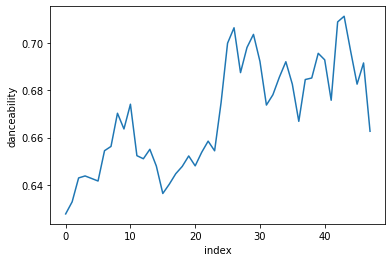

In [18]:
# stats = df.mean()
# stats['date'] = '2020-04-01'
# stats
# music_prop_avg = music_prop_avg.reset_index()
# music_prop_avg.head()
# sns.set(x_ticks = np.arange(0,24,1))
p = sns.lineplot(data=music_prop_avg, x='index', y='danceability')
# p.set(xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])